Offence dates for a crime

In [159]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

plt.style.use('ggplot')

In [160]:
dt_date_r = pd.read_csv('dt_date_r.csv', sep=',')
print(dt_date_r)

     age_cat  dates_diff_in_days         ethnicity score_text     sex
0      adult                 160  African-American        Low    Male
1      young                  64  African-American        Low    Male
2      adult                  41         Caucasian     Medium    Male
3      young                 736         Caucasian        Low    Male
4      young                 128  African-American     Medium    Male
...      ...                 ...               ...        ...     ...
3088  senior                 286  African-American     Medium    Male
3089   young                 296         Caucasian        Low  Female
3090   young                   9  African-American        Low    Male
3091  senior                  30  African-American        Low    Male
3092   young                 513         Caucasian     Medium    Male

[3093 rows x 5 columns]


In [161]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [162]:
X = dt_date_r[['age_cat', 'ethnicity', 'score_text', 'sex']]
y = dt_date_r['dates_diff_in_days']

In [163]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,age_cat_senior,age_cat_young,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other,score_text_Low,score_text_Medium,sex_Male
0,0,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,1,1
3,0,1,0,1,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,1,1


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2319, 10)
(774, 10)
(2319,)
(774,)


In [165]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#The intercept (often labeled the constant) is the expected mean value of Y when all X=0. 
#In a purely mathematical sense, this definition is correct

print(model.intercept_)

298.71399333484396


In [166]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
coeff_parameter

,coefficient
age_cat_senior,47.857954
age_cat_young,-17.088324
ethnicity_Asian,89.822557
ethnicity_Caucasian,-27.749853
ethnicity_Hispanic,-4.900140
ethnicity_Native American,-0.566236
ethnicity_Other,-6.337896
score_text_Low,26.047265
score_text_Medium,15.459139
sex_Male,-0.796888


c:\Users\giada\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dates_diff_in_days'>

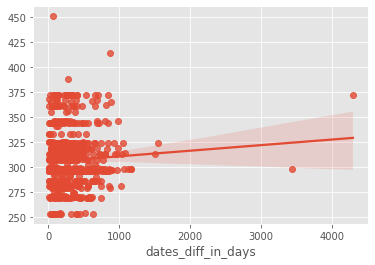

In [167]:
predictions = model.predict(X_test)
sn.regplot(y_test,predictions)

In [168]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:     dates_diff_in_days   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.747
Date:                Wed, 15 Jun 2022   Prob (F-statistic):             0.0653
Time:                        12:56:57   Log-Likelihood:                -16513.
No. Observations:                2319   AIC:                         3.305e+04
Df Residuals:                    2308   BIC:                         3.311e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

eval_env: 1


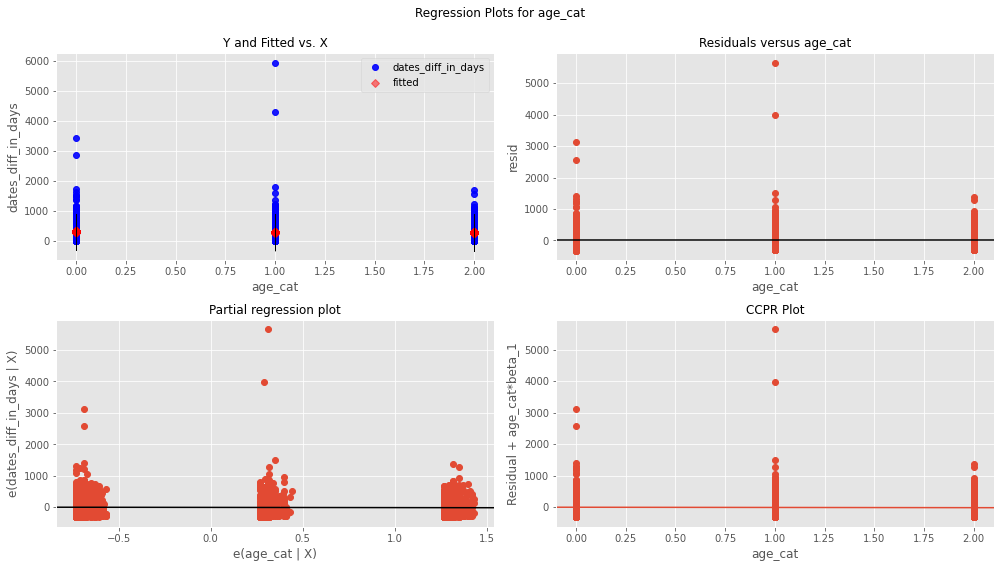

eval_env: 1


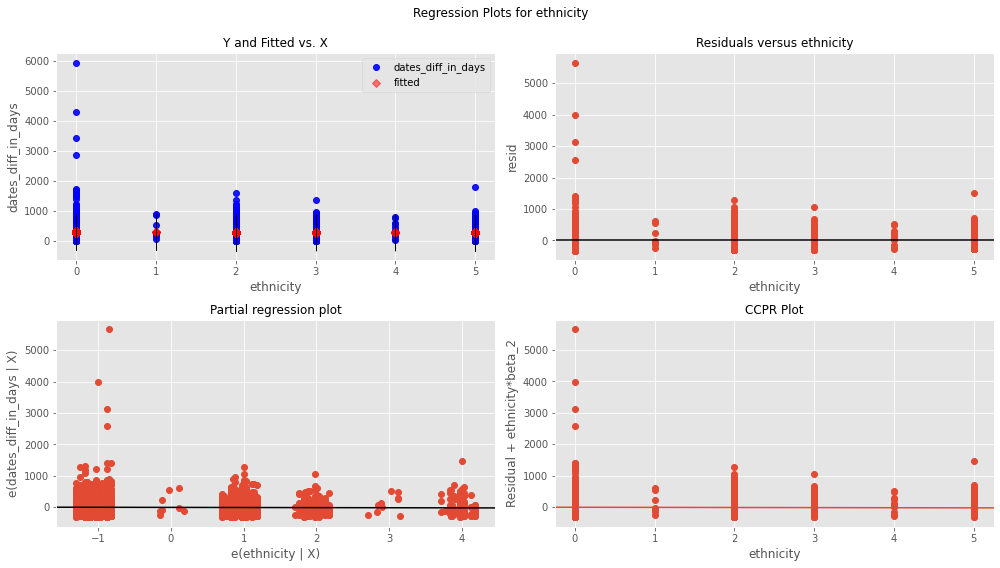

eval_env: 1


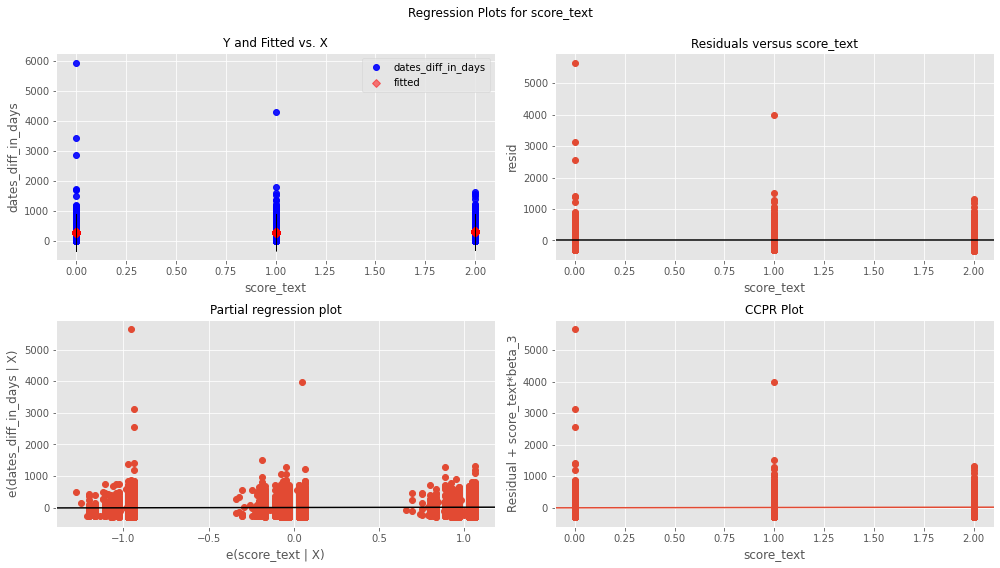

eval_env: 1


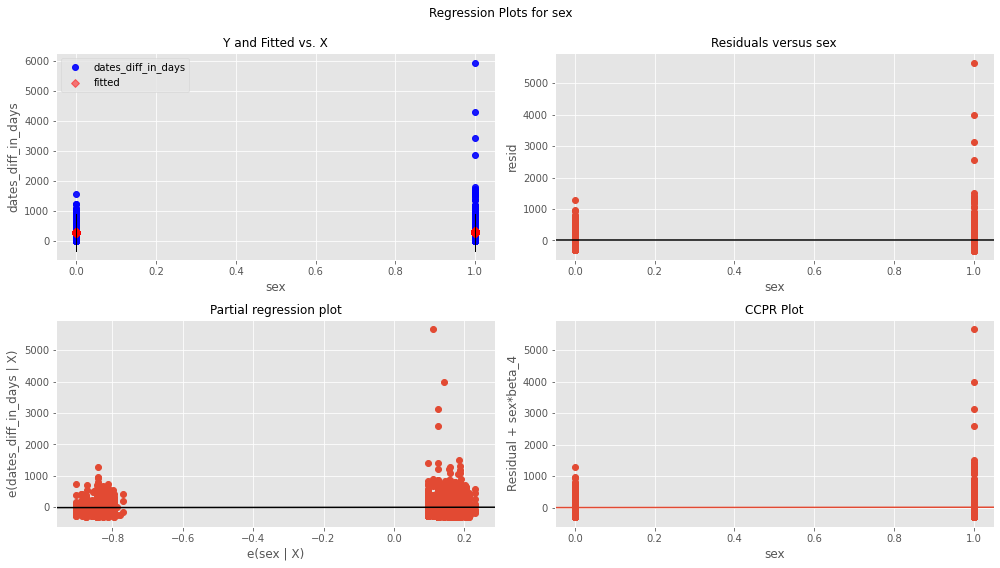

In [189]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dt_date_r= pd.read_csv('dt_date_r.csv')
dt_date_r['age_cat'] = dt_date_r['age_cat'].astype('category')
dt_date_r['ethnicity'] = dt_date_r['ethnicity'].astype('category')
dt_date_r['score_text'] = dt_date_r['score_text'].astype('category')
dt_date_r['sex'] = dt_date_r['sex'].astype('category')

number = preprocessing.LabelEncoder()
for attribute in dt_date_r.columns:
    if dt_date_r[attribute].dtype.name == "category":
        dt_date_r[attribute] = number.fit_transform(dt_date_r[attribute])

results = smf.ols('dates_diff_in_days ~ age_cat + ethnicity + score_text + sex',data=dt_date_r).fit()
attributes = [ 'age_cat', 'ethnicity', 'score_text', 'sex']
for attribute in attributes:
    fig= plt.figure(figsize=(14,8)) 
    sm.graphics.plot_regress_exog(results, attribute, fig=fig)
    plt.show()

Offence dates for a violent crime

In [ ]:
dt_date_v = pd.read_csv('dt_date_v.csv', sep=',')
print(dt_date_v)

    age_cat  dates_diff_in_days         ethnicity   sex v_score_text
0     adult                 160  African-American  Male          Low
1     young                 736         Caucasian  Male       Medium
2     adult                 242         Caucasian  Male          Low
3     adult                 659  African-American  Male          Low
4     adult                 296  African-American  Male       Medium
..      ...                 ...               ...   ...          ...
723   young                 217  African-American  Male       Medium
724   adult                 252  African-American  Male          Low
725   adult                 926  African-American  Male       Medium
726  senior                 741  African-American  Male         High
727   adult                 337         Caucasian  Male          Low

[728 rows x 5 columns]


In [ ]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

In [ ]:
X = dt_date_v[['age_cat', 'ethnicity', 'v_score_text', 'sex']]
y = dt_date_v['dates_diff_in_days']

In [ ]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,age_cat_senior,age_cat_young,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other,v_score_text_Low,v_score_text_Medium,sex_Male
0,0,0,0,0,0,0,0,1,0,1
1,0,1,0,1,0,0,0,0,1,1
2,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(546, 10)
(182, 10)
(546,)
(182,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#The intercept (often labeled the constant) is the expected mean value of Y when all X=0. 
#In a purely mathematical sense, this definition is correct

print(model.intercept_)

445.7015289297923


In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])
coeff_parameter

,coefficient
age_cat_senior,124.789211
age_cat_young,-8.889943
ethnicity_Asian,-42.569574
ethnicity_Caucasian,-75.149561
ethnicity_Hispanic,45.466648
ethnicity_Native American,364.672239
ethnicity_Other,-84.999001
v_score_text_Low,-32.905414
v_score_text_Medium,23.736487
sex_Male,-45.110255


c:\Users\giada\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dates_diff_in_days'>

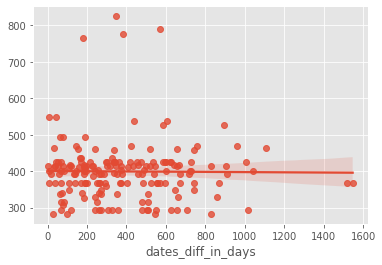

In [ ]:
predictions = model.predict(X_test)
sn.regplot(y_test,predictions)

In [ ]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:     dates_diff_in_days   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.798
Date:                Wed, 15 Jun 2022   Prob (F-statistic):             0.0581
Time:                        12:39:11   Log-Likelihood:                -3935.6
No. Observations:                 546   AIC:                             7893.
Df Residuals:                     535   BIC:                             7941.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

eval_env: 1


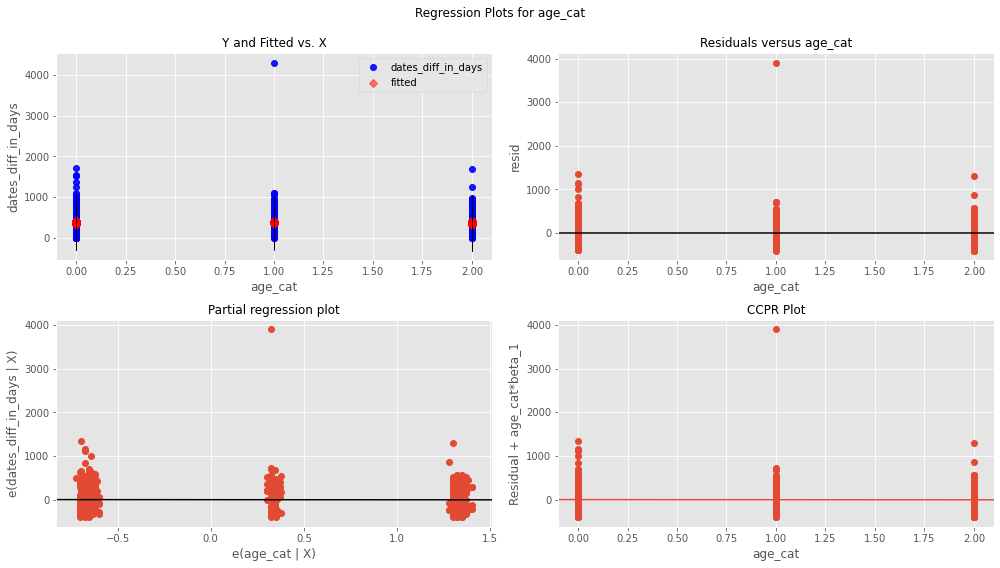

eval_env: 1


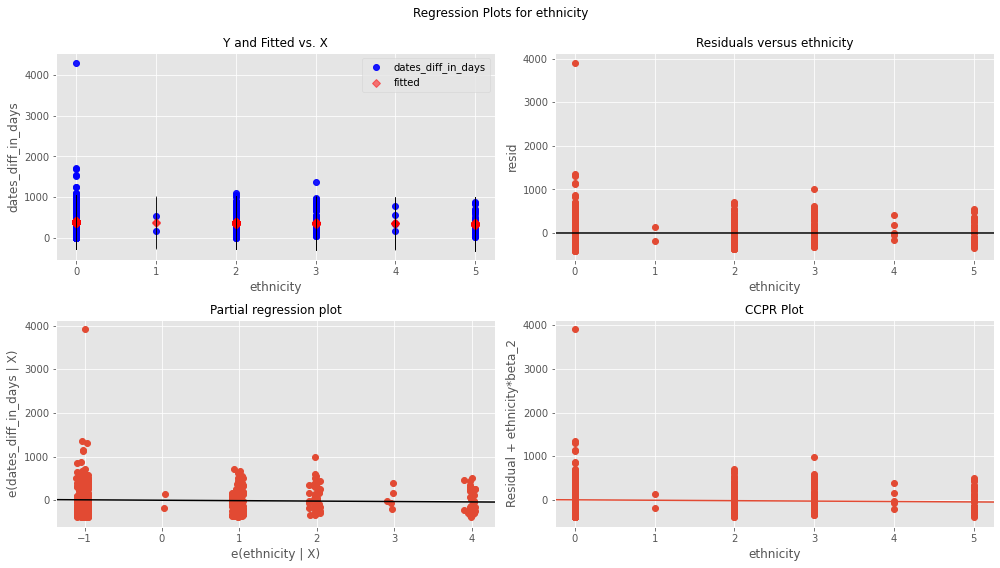

eval_env: 1


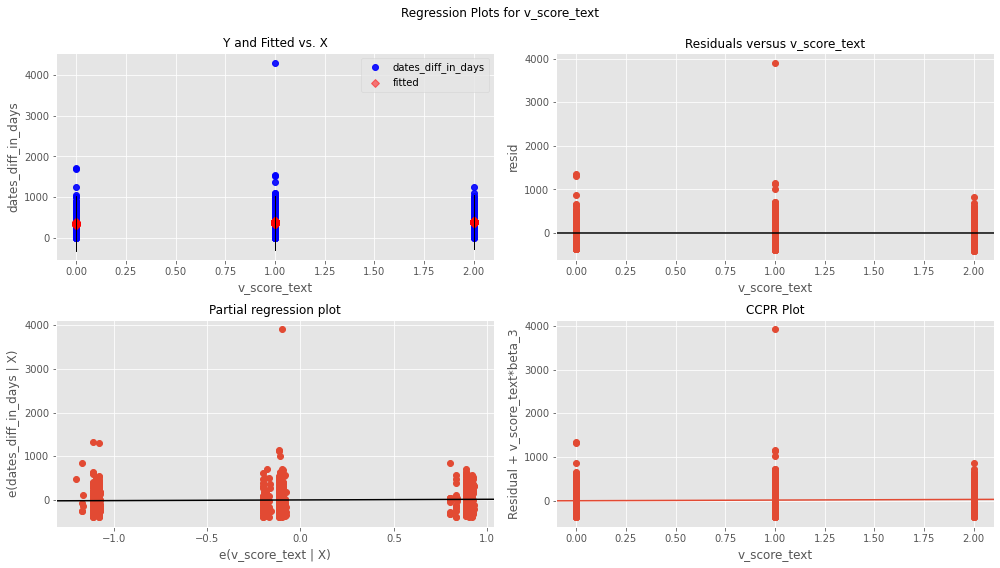

eval_env: 1


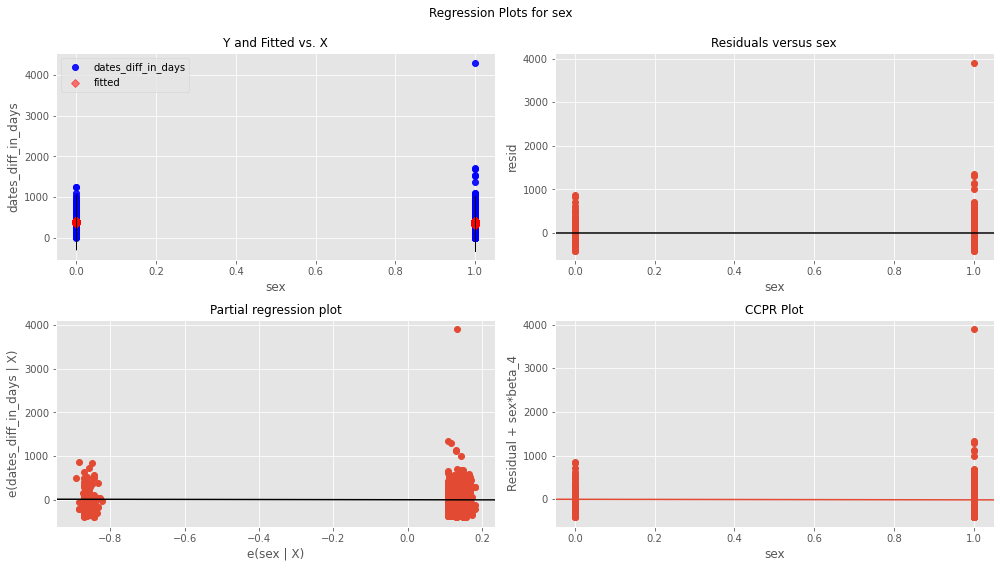

In [191]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

dt_date_v= pd.read_csv('dt_date_v.csv')
dt_date_v['age_cat'] = dt_date_v['age_cat'].astype('category')
dt_date_v['ethnicity'] = dt_date_v['ethnicity'].astype('category')
dt_date_v['v_score_text'] = dt_date_v['v_score_text'].astype('category')
dt_date_v['sex'] = dt_date_v['sex'].astype('category')

number = preprocessing.LabelEncoder()
for attribute in dt_date_v.columns:
    if dt_date_v[attribute].dtype.name == "category":
        dt_date_v[attribute] = number.fit_transform(dt_date_v[attribute])

results = smf.ols('dates_diff_in_days ~ age_cat + ethnicity + v_score_text + sex',data=dt_date_v).fit()
attributes = [ 'age_cat', 'ethnicity', 'v_score_text', 'sex']
for attribute in attributes:
    fig= plt.figure(figsize=(14,8)) 
    sm.graphics.plot_regress_exog(results, attribute, fig=fig)
    plt.show()